In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

## Reading data

In [2]:
data_train = pd.read_csv('data/application_train.csv')
print('Training data shape: ', data_train.shape)
data_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


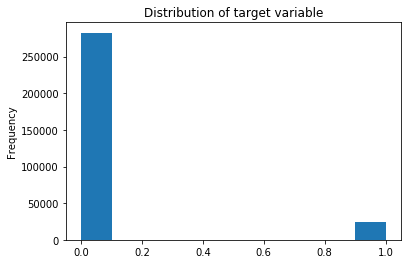

In [3]:
data_train['TARGET'].plot.hist(title="Distribution of target variable");

In [4]:
data_test = pd.read_csv('data/application_test.csv')
print('Test data shape: ', data_test.shape)
data_test.head()

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values

In [5]:
def check_missing_values(df):
        
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val/ len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print (str(mis_val_table.shape[0])+ " columns out of " + str(df.shape[1]) + " have missing values.\n")
        
        return mis_val_table

In [6]:
missing_values = check_missing_values(data_train)
missing_values.head(10)

67 columns out of 122 have missing values.



,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


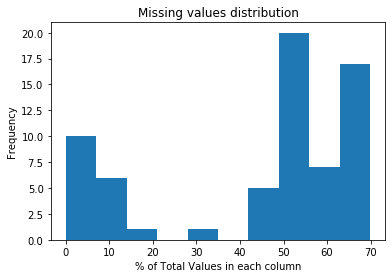

In [7]:
missing_values['% of Total Values'].plot.hist(title="Missing values distribution")
plt.xlabel('% of Total Values in each column');

In [8]:
drop_labels=missing_values[missing_values['% of Total Values']>50].index.values
X_train=data_train.drop(drop_labels, axis=1)
X_test=data_test.drop(drop_labels, axis=1)

## Encoding Categorical Variables

In [9]:
X_train.dtypes.value_counts()

int64      41
float64    27
object     13
dtype: int64

In [10]:
#label encoding for variables with 2 unique values
le = LabelEncoder()
le_count = 0

for col in X_train:
    if X_train[col].dtype == 'object':
        if len(list(X_train[col].unique())) <= 2:
            le.fit(X_train[col])
            X_train[col] = le.transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
            
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [11]:
#one-hot encoding for variables with more than 2 unique values
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print('Training Features shape: ', X_train.shape)
print('Testing Features shape: ', X_test.shape)


Training Features shape:  (307511, 191)
Testing Features shape:  (48744, 187)


In [12]:
# Aligning train and test data to be of the same dimension

output_labels = X_train['TARGET']

X_train, X_test = X_train.align(X_test, join = 'inner', axis = 1)

X_train['TARGET'] = output_labels

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)


Training data shape:  (307511, 188)
Testing data shape:  (48744, 187)


## Data exploration

In [13]:
X_train['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [14]:
X_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [15]:
X_train['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [16]:
(X_train['DAYS_BIRTH']/ -365).describe()  

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [17]:
(X_train['DAYS_EMPLOYED']/ -365).describe() 

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

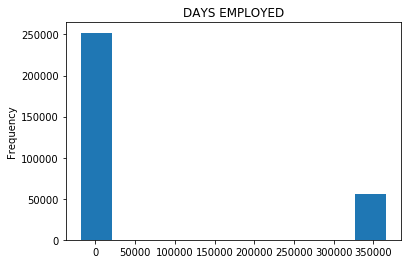

In [18]:
X_train['DAYS_EMPLOYED'].plot.hist(title="DAYS EMPLOYED")

In [19]:
X_train[X_train['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED']

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

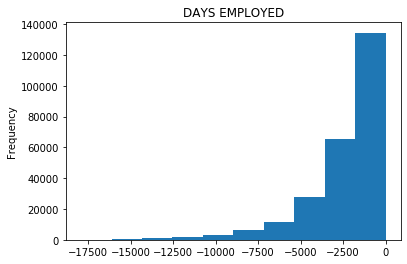

In [20]:
X_train['DAYS_EMPLOYED_ANOM'] = X_train["DAYS_EMPLOYED"] == 365243
X_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
X_train['DAYS_EMPLOYED'].plot.hist(title="DAYS EMPLOYED");

In [21]:
X_test['DAYS_EMPLOYED_ANOM'] = X_test["DAYS_EMPLOYED"] == 365243
X_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [22]:
X_train['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [23]:
X_train['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [24]:
#checking correlation of explanatory variables with response variable
correlations = X_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n',correlations.tail(15))
print('\nMost Negative Correlations:\n',correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

## Filling missing values and normalization

In [25]:
print(X_train.shape)
print(X_test.shape)

(307511, 189)
(48744, 188)


In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#drop target and id from data
output= X_train['TARGET']
id_train=X_train['SK_ID_CURR']
train = X_train.drop(columns = ['TARGET','SK_ID_CURR'])
id_test=X_test['SK_ID_CURR']
test = X_test.drop(columns=['SK_ID_CURR'])
features = list(train.columns)

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 187)
Testing data shape:  (48744, 187)


## Random Forest

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [28]:
#optimal number of trees
n_B=int(math.sqrt(len(train)))
n_B

554

In [29]:
rf = RandomForestClassifier(n_estimators = n_B, max_samples=250*n_B, max_depth=100, bootstrap=True,
                            max_features="auto", verbose=1,n_jobs = -1, random_state = 42)
rf.fit(train, output)
pred = rf.predict_proba(test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 554 out of 554 | elapsed:  3.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 554 out of 554 | elapsed:    5.0s finished


In [30]:
max(pred)

0.463898916967509

In [31]:
feature_importance_values = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values('importance', ascending=False).head(15)

,feature,importance
29,EXT_SOURCE_2,0.060212
30,EXT_SOURCE_3,0.055842
9,DAYS_BIRTH,0.041976
12,DAYS_ID_PUBLISH,0.041589
11,DAYS_REGISTRATION,0.041057
6,AMT_ANNUITY,0.038242
10,DAYS_EMPLOYED,0.037673
42,DAYS_LAST_PHONE_CHANGE,0.036897
5,AMT_CREDIT,0.035912
4,AMT_INCOME_TOTAL,0.031980


## Exporting results to csv

In [32]:
result= X_test[['SK_ID_CURR']]
result['TARGET'] = pred

result.to_csv('result.csv', index = False)
len(result)==48744

/home/kostuss16/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


True